In [1]:
from keras.utils import np_utils
from keras.models import load_model
import numpy as np
from numpy import argmax
import time

# 이미지 리사이징 , 시각화 관련
import sys 

from PyQt5.QtWidgets import QMainWindow, QApplication, QDesktopWidget
from PyQt5.QtCore import Qt
from PyQt5 import QtCore
from PyQt5.uic import * 
from PyQt5.QtWidgets import *
from PyQt5.QtGui import *
from PyQt5.QtCore import *

#이미지 처리 관련
from PIL import Image
import PIL.ImageOps
import matplotlib.pyplot as plt
import io

from pynput.mouse import Listener

#시간측정관련
import time

# 디스플레이 클리어
from IPython.display import clear_output


Using TensorFlow backend.


In [2]:
alphabet = ['A','B','C','D','E','F','G','H','I','J','K','L','M','M','O','P','Q','R','S','T','U','V','W','X','Y','Z']

T
C
G
O
O
G
A


SystemExit: 0

C:\Users\LimYongKwan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


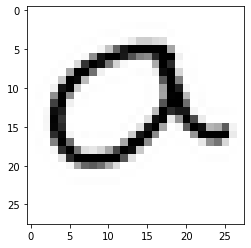

In [3]:
class DrawingPad(QFrame):
    
    def __init__(self, parent=None):
        QFrame.__init__(self, parent)
#         self.setAttribute(Qt.WA_StaticContents)
#         self.setAttribute(Qt.WA_TranslucentBackground,True)
#         self.setAttribute(Qt.WA_NoSystemBackground, True)
        
        self.letterImg = QImage(300, 300, QImage.Format_ARGB32)
        self.path = QPainterPath()
        self.clearImg()
        self.model = load_model('./model/0.1529-25.hdf5')

        # 10개가되면 아웃풋 클리어
        self.count = 0
        
        
    def setPenColor(self, newColor):
        self.myPenColor = newColor

    def setPenWidth(self, newWidth):
        self.myPenWidth = newWidth

    def clearImg(self):
        clear_output()
        self.path = QPainterPath()
        self.letterImg.fill(Qt.white)  
        self.update()

    def recognition_Image(self):
        # ------------------ Recognition 버튼을 눌렀을때 시간체크 시작 ----------------------
        time1 = time.time()
        
        # 쓴 글자를 모델에 넣기 위해 버퍼에 저장.
        buffer = QBuffer()
        buffer.open(QBuffer.ReadWrite)
        self.letterImg.save(buffer,"PNG")
        
        # QImage -> PIL.Image 로 타입 변환 및 모델에 넣기 위해 크기 변환
        pil_Img = Image.open(io.BytesIO(buffer.data())).convert('L')
        NewSize = (28,28)
        pil_Img = pil_Img.resize(NewSize,Image.ANTIALIAS)
        pil_Img = PIL.ImageOps.invert(pil_Img)
        pil_Img = np.resize(pil_Img,(1,28,28))
#         이미지가 제대로 변환됐는지 중간 검사 코드
        plt.imshow(pil_Img[0],cmap='Greys')
        pil_Img = pil_Img.reshape(pil_Img.shape[0],28 ,28,1).astype('float32')/255
        
        
        #모델에 입력
        print(alphabet[int(self.model.predict_classes(pil_Img))-1])
        print(self.model.predict(pil_Img))
        # ------------------ 모델에 넣은 글자가 predict 함수를 마치고 시간체크 ----------------------
        time2 = time.time()
        print(time2-time1)
        
        
    def paintEvent(self, event):
        painter = QPainter(self)
        painter.drawImage(event.rect(), self.letterImg, self.rect())

    def mousePressEvent(self, event):
        self.path.moveTo(event.pos())
        self.time1 = time.time()
        

    def mouseMoveEvent(self, event):
        self.path.lineTo(event.pos())
        p = QPainter(self.letterImg)
        # 펜의 크기 , 색 설정
        p.setPen(QPen(Qt.black,20, Qt.SolidLine, Qt.RoundCap,Qt.RoundJoin))
        p.drawPath(self.path)
        p.end()
        self.update()
        
        
        # 그리는 도중 추천을 해준다 0.2 초간격으로 인식하여 추천
        self.time2 = time.time()
        if (self.time2 - self.time1) > 0.1 :
            self.time1 = time.time()
            
            buffer = QBuffer()
            buffer.open(QBuffer.ReadWrite)
            self.letterImg.save(buffer,"PNG")
            
            # QImage -> PIL.Image 로 타입 변환 및 모델에 넣기 위해 크기 변환
            pil_Img = Image.open(io.BytesIO(buffer.data())).convert('L')
            NewSize = (28,28)
            pil_Img = pil_Img.resize(NewSize,Image.ANTIALIAS)
            pil_Img = PIL.ImageOps.invert(pil_Img)
            pil_Img = np.resize(pil_Img,(1,28,28))
    #         이미지가 제대로 변환됐는지 중간 검사 코드
            plt.imshow(pil_Img[0],cmap='Greys')
            pil_Img = pil_Img.reshape(pil_Img.shape[0],28 ,28,1).astype('float32')/255

            #모델에 입력
            self.count += 1
            if self.count == 10:
                clear_output()
                self.count = 0
            print(alphabet[int(self.model.predict_classes(pil_Img))-1])

        
    def sizeHint(self):
        return QSize(300, 300)


if __name__ == '__main__':
    app = QApplication(sys.argv)
    widget = QWidget()
    widget.setWindowFlags(
        widget.windowFlags() | QtCore.Qt.FramelessWindowHint
    )
    widget.resize(800,800)
    
    # 버튼을 생성
    btnRecognition  = QPushButton("Recognition")
    btnClear = QPushButton("Clear")
   
    btnRec1 = QPushButton(" ")
    btnRec2 = QPushButton(" ")
    btnRec3 = QPushButton(" ")
    # DrawingPad 객체 생성
    drawWindow = DrawingPad()
    
    # Layout 을 설정
    #
    # OuterLayout(Box) 안에 InnerLayout(Grid)
    # 
    # 구조
    # QBoxLayout - GridLayout(btnRecognit,btnClear)
    # QBoxLayout - Draw
    #
    
    recLayout = QGridLayout()
    recLayout.addWidget(btnRec1,0,0)
    recLayout.addWidget(btnRec2,0,1)
    recLayout.addWidget(btnRec3,0,2)
    
    OuterLayout = QVBoxLayout()
    widget.setLayout(OuterLayout)
    
    InnerLayout = QGridLayout()
    InnerLayout.addWidget(btnRecognition,0,0)
    InnerLayout.addWidget(btnClear,0,1)
    
    OuterLayout.addLayout(recLayout)
    OuterLayout.addLayout(InnerLayout)
    widget.layout().addWidget(drawWindow)

    # 버튼 클릭시 이벤트를 설정
    btnRecognition.clicked.connect(lambda: drawWindow.recognition_Image())
    btnClear.clicked.connect(drawWindow.clearImg)

    widget.show()
    sys.exit(app.exec_())